<a href="https://colab.research.google.com/github/AfsanehShamsaddini/Medical_Insurance_Cost_Prediction/blob/main/Medical_Insurance_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Medical Cost with Linear Regression¶
age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Data Collection & Analysis

In [76]:
# loading the data from csv file to a Pandas DataFrame
insurance_data = pd.read_csv('/content/drive/MyDrive/ML/medical/insurance.csv')

In [77]:
# first 5 rows of the dataframe
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [78]:
# number of rows and columns
insurance_data.shape

(1338, 7)

In [79]:
# Getting some informations about dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [80]:
# statistical Measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [81]:
# Check Categorical & Numerical features
num_cols = insurance_data.iloc[:,:-1].select_dtypes(include= np.number).columns.tolist()

cat_cols = insurance_data.iloc[:, :-1].select_dtypes(include=['object']).columns.tolist()

print(f"Numerical Columns are: {num_cols}")
print(f"Categorical Columns are: {cat_cols}")

Numerical Columns are: ['age', 'bmi', 'children']
Categorical Columns are: ['sex', 'smoker', 'region']


In [82]:
# Checking missing values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [83]:
# Checking duplicate data
insurance_data.duplicated().sum()

np.int64(1)

In [84]:
# Drop duplicate data
insurance_data = insurance_data.drop_duplicates()

In [85]:
insurance_data.shape

(1337, 7)

/tmp/ipython-input-1115596716.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


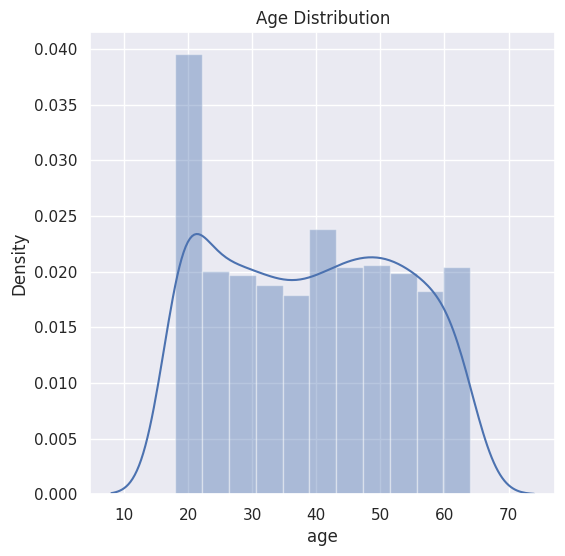

In [86]:
# Distributaion of age value
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

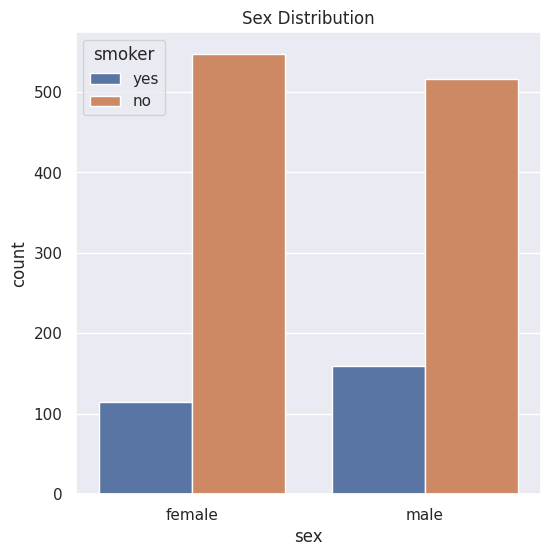

In [87]:
# Gender column
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data = insurance_data, hue='smoker')
plt.title('Sex Distribution')
plt.show()

/tmp/ipython-input-1272736385.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data = insurance_data, palette={'male': 'orange', 'female': 'blue'})


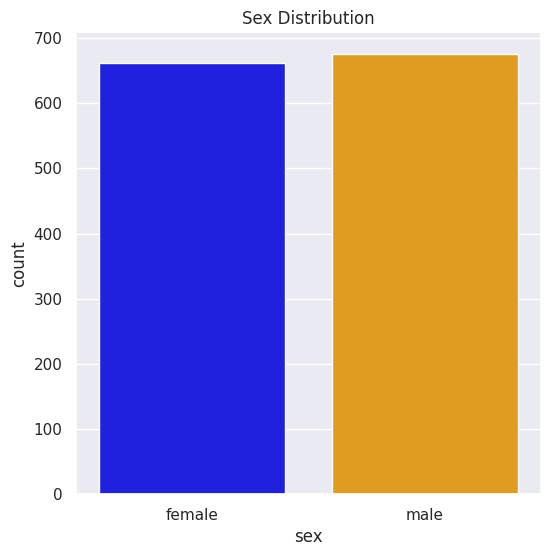

In [88]:
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data = insurance_data, palette={'male': 'orange', 'female': 'blue'})
plt.title('Sex Distribution')
plt.show()


In [89]:
insurance_data['sex'].value_counts()

,count
sex,
male,675
female,662


/tmp/ipython-input-2900023401.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


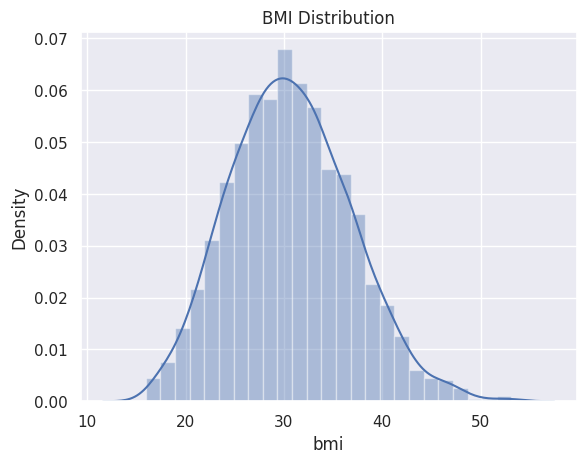

In [90]:
# BMI Distribution
plt.plot(figsize=(6, 6))
sns.distplot(insurance_data['bmi'])
plt.title('BMI Distribution')
plt.show()

## Normal BMI Range --> 18.5 to 24.9

/tmp/ipython-input-3570344249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='children', data=insurance_data, palette='Set1')


<function matplotlib.pyplot.show(close=None, block=None)>

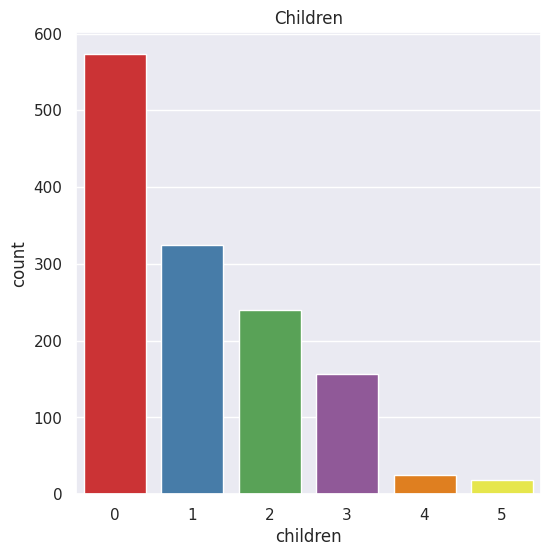

In [91]:
# Children column
plt.figure(figsize=(6, 6))
sns.countplot(x ='children', data=insurance_data, palette='Set1')
plt.title('Children')
plt.show

In [92]:
insurance_data['children'].value_counts()

,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


/tmp/ipython-input-2566500604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'smoker', data=insurance_data, palette='Set2')


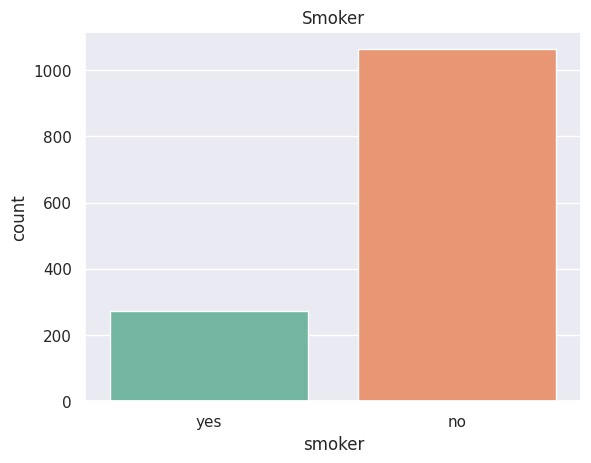

In [93]:
# Smoker column
plt.plot(figsize=(6, 6))
sns.countplot(x= 'smoker', data=insurance_data, palette='Set2')
plt.title('Smoker')
plt.show()

In [94]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


/tmp/ipython-input-3457198359.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'region', data=insurance_data, palette='Set1')


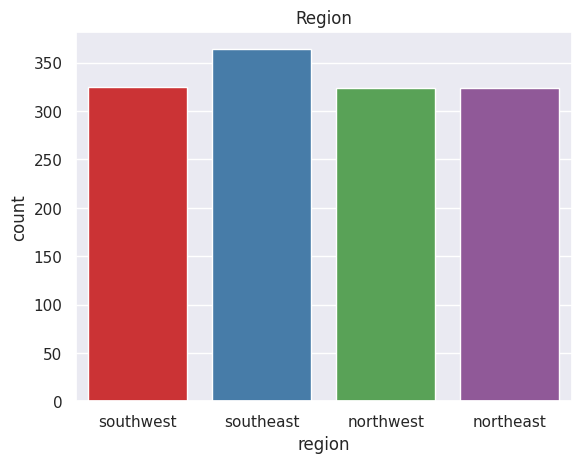

In [95]:
# Region column
plt.plot(figsize=(6, 6))
sns.countplot(x= 'region', data=insurance_data, palette='Set1')
plt.title('Region')
plt.show()

In [96]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


/tmp/ipython-input-1720846256.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


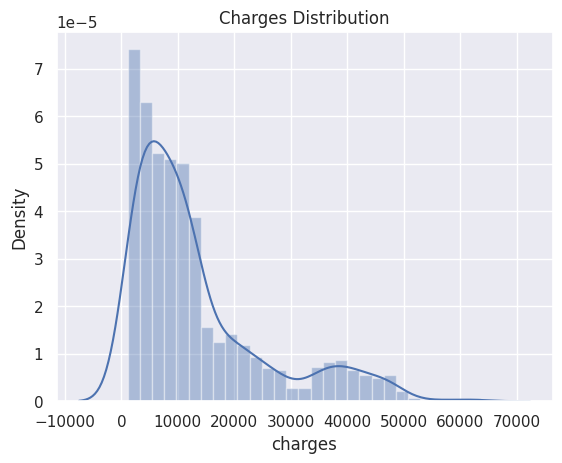

In [97]:
# Charges Distribution
plt.plot(figsize=(6, 6))
sns.distplot(insurance_data['charges'])
plt.title('Charges Distribution')
plt.show()

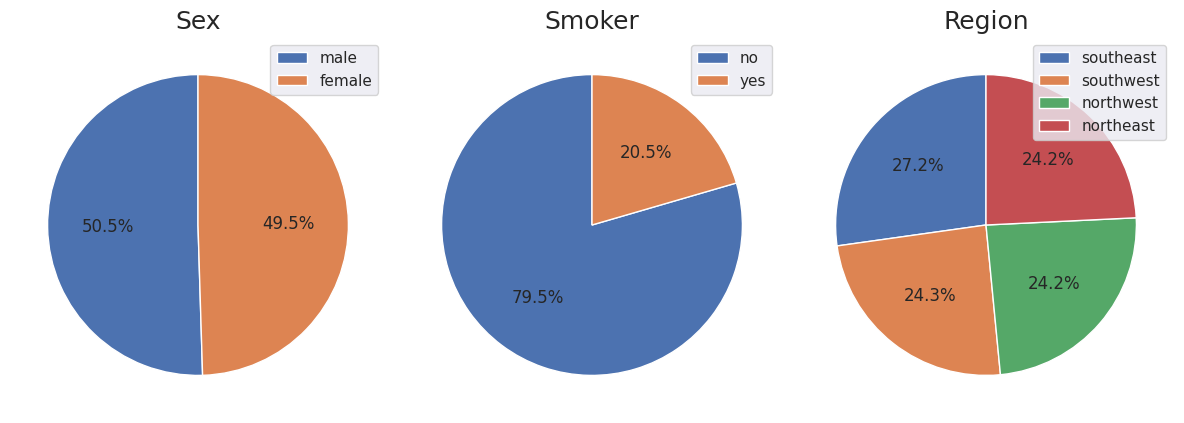

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(12, 10))

axs[0].pie((insurance_data['sex']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axs[0].set_title('Sex', fontsize = 18)
axs[0].legend(labels = insurance_data['sex'].value_counts().index, loc='upper right')

axs[1].pie((insurance_data['smoker']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axs[1].set_title('Smoker', fontsize = 18)
axs[1].legend(labels = insurance_data['smoker'].value_counts().index, loc='upper right')

axs[2].pie((insurance_data['region']).value_counts(), autopct = '%1.1f%%', startangle = 90)
axs[2].set_title('Region', fontsize = 18)
axs[2].legend(labels = insurance_data['region'].value_counts().index, loc='upper right')

plt.tight_layout()
plt.show()

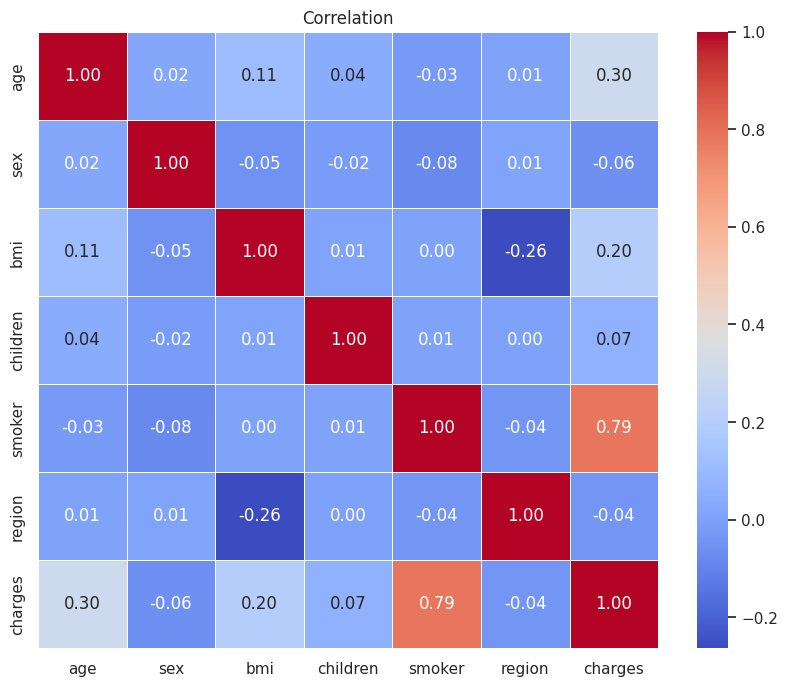

In [110]:
correlation_matrix = insurance_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation')
plt.show()

# Data Pre-Processing
## Encoding the categorical features

In [99]:
# Encoking sex column
insurance_data.replace({
    'sex':{
        'male':0,
        'female':1
    }}, inplace= True)

# Encoking smoker column
insurance_data.replace({
    'smoker':{
        'no':0,
        'yes':1
    }}, inplace= True)

# Encoking region column
insurance_data.replace({
    'region':{
        'southeast':0,
        'southwest':1,
        'northwest':2,
        'northeast':3
    }}, inplace= True)

insurance_data.head()

/tmp/ipython-input-3453149296.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({
/tmp/ipython-input-3453149296.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({
/tmp/ipython-input-3453149296.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insuran

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


## Splitting the Features and Target

In [100]:
X= insurance_data.drop(columns='charges', axis=1)
y= insurance_data['charges']
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1337 rows x 6 columns]


In [101]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


## Splitting the data into Training data & Testing Data

In [102]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [103]:
print(X.shape, x_train.shape, x_test.shape)

(1337, 6) (1069, 6) (268, 6)


# Model Training
## Linear Regression

In [104]:
lr_model = LinearRegression()

In [105]:
lr_model.fit(x_train, y_train)

LinearRegression()

## Model Evaluation

In [114]:
# Prediction on training data
training_data_prediction = lr_model.predict(x_train)

# R squared value
r2_train = metrics.r2_score( y_train, training_data_prediction)
mse_train = metrics.mean_squared_error(y_train, training_data_prediction)
rmse_train = np.sqrt(mse_train)


print(f"Linear Regression Modet:")
print(f"MSE Test: {mse_train:.2f}")
print(f"RMSE Test: {rmse_train:.2f}")
print(f"R2 Score Test: {r2_train:.4f}")

Linear Regression Modet:
MSE Test: 35084452.69
RMSE Test: 5923.21
R2 Score Test: 0.7587


In [112]:
# Prediction on test data
test_data_prediction = lr_model.predict(x_test)

# R squared value
r2_test = metrics.r2_score( y_test, test_data_prediction)
mse_test = metrics.mean_squared_error(y_test, test_data_prediction)
rmse_test = np.sqrt(mse_test)


print(f"Linear Regression Modet:")
print(f"MSE Test: {mse_test:.2f}")
print(f"RMSE Test: {rmse_test:.2f}")
print(f"R2 Score Test: {r2_test:.4f}")

Linear Regression Modet:
MSE Test: 42793733.54
RMSE Test: 6541.69
R2 Score Test: 0.7167


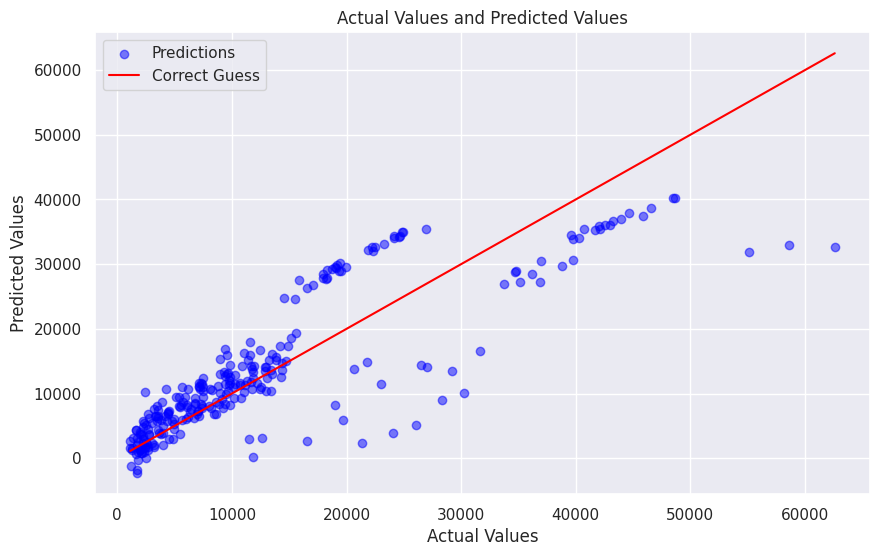

In [116]:
# Combine actual values and estimated values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, test_data_prediction, color='blue', alpha= 0.5, label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Correct Guess')

plt.title("Actual Values and Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

## XGBRegressor


In [119]:
XGB_model = XGBRegressor()
# Define hyperparemeter grid
param_grid = {
    'regressor__n_estimators': [100, 300],
    'regressor__max_depth': [3, 4, 5],
    'regressor__learning_rate': [0.5, 0.08, 0.1],
}

# Set up GridSearchCV
grid = GridSearchCV(XGB_model, param_grid , cv=3, scoring='r2', verbose=1)

grid.fit(x_train, y_train)

best_model = grid.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:35:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "regressor__learning_rate", "regressor__max_depth", "regressor__n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:35:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "regressor__learning_rate", "regressor__max_depth", "regressor__n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:35:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "regressor__learning_rate", "regressor__max_depth", "regressor__n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [06:35:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "regres

In [120]:
# Predict on test data
y_pred_test = best_model.predict(x_test)

#  Calculate evaluation metrics
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
mae = metrics.mean_absolute_error(y_test, y_pred_test)
r2 = metrics. r2_score(y_test,y_pred_test)

#  Display results
print(" Test Set Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

 Test Set Evaluation:
Root Mean Squared Error (RMSE): 5413.38
Mean Absolute Error (MAE): 3057.69
R² Score: 0.81


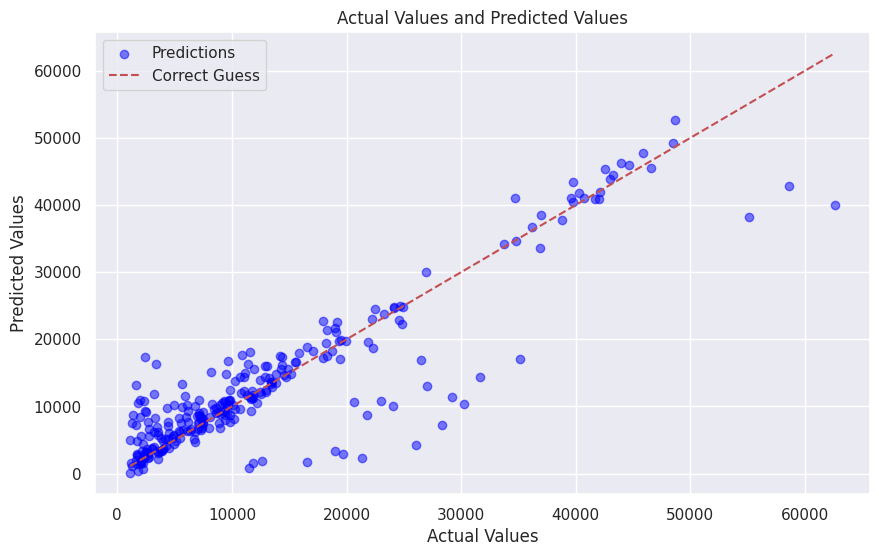

In [122]:
# Combine actual values and estimated values
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_test, color='blue', alpha= 0.5, label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label='Correct Guess')

plt.title("Actual Values and Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

## Train Decision Tree Regressor Model

In [125]:
tree_model = DecisionTreeRegressor()

tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [129]:
# Prediction on test data
test_data_prediction = tree_model.predict(x_test)

# R squared value
r2_test_tree = metrics.r2_score( y_test, test_data_prediction)


print(f"Decision Tree Model:")
print(f"R2 Score Test: {r2_test_tree:.4f}")

Decision Tree Model:
R2 Score Test: 0.7108


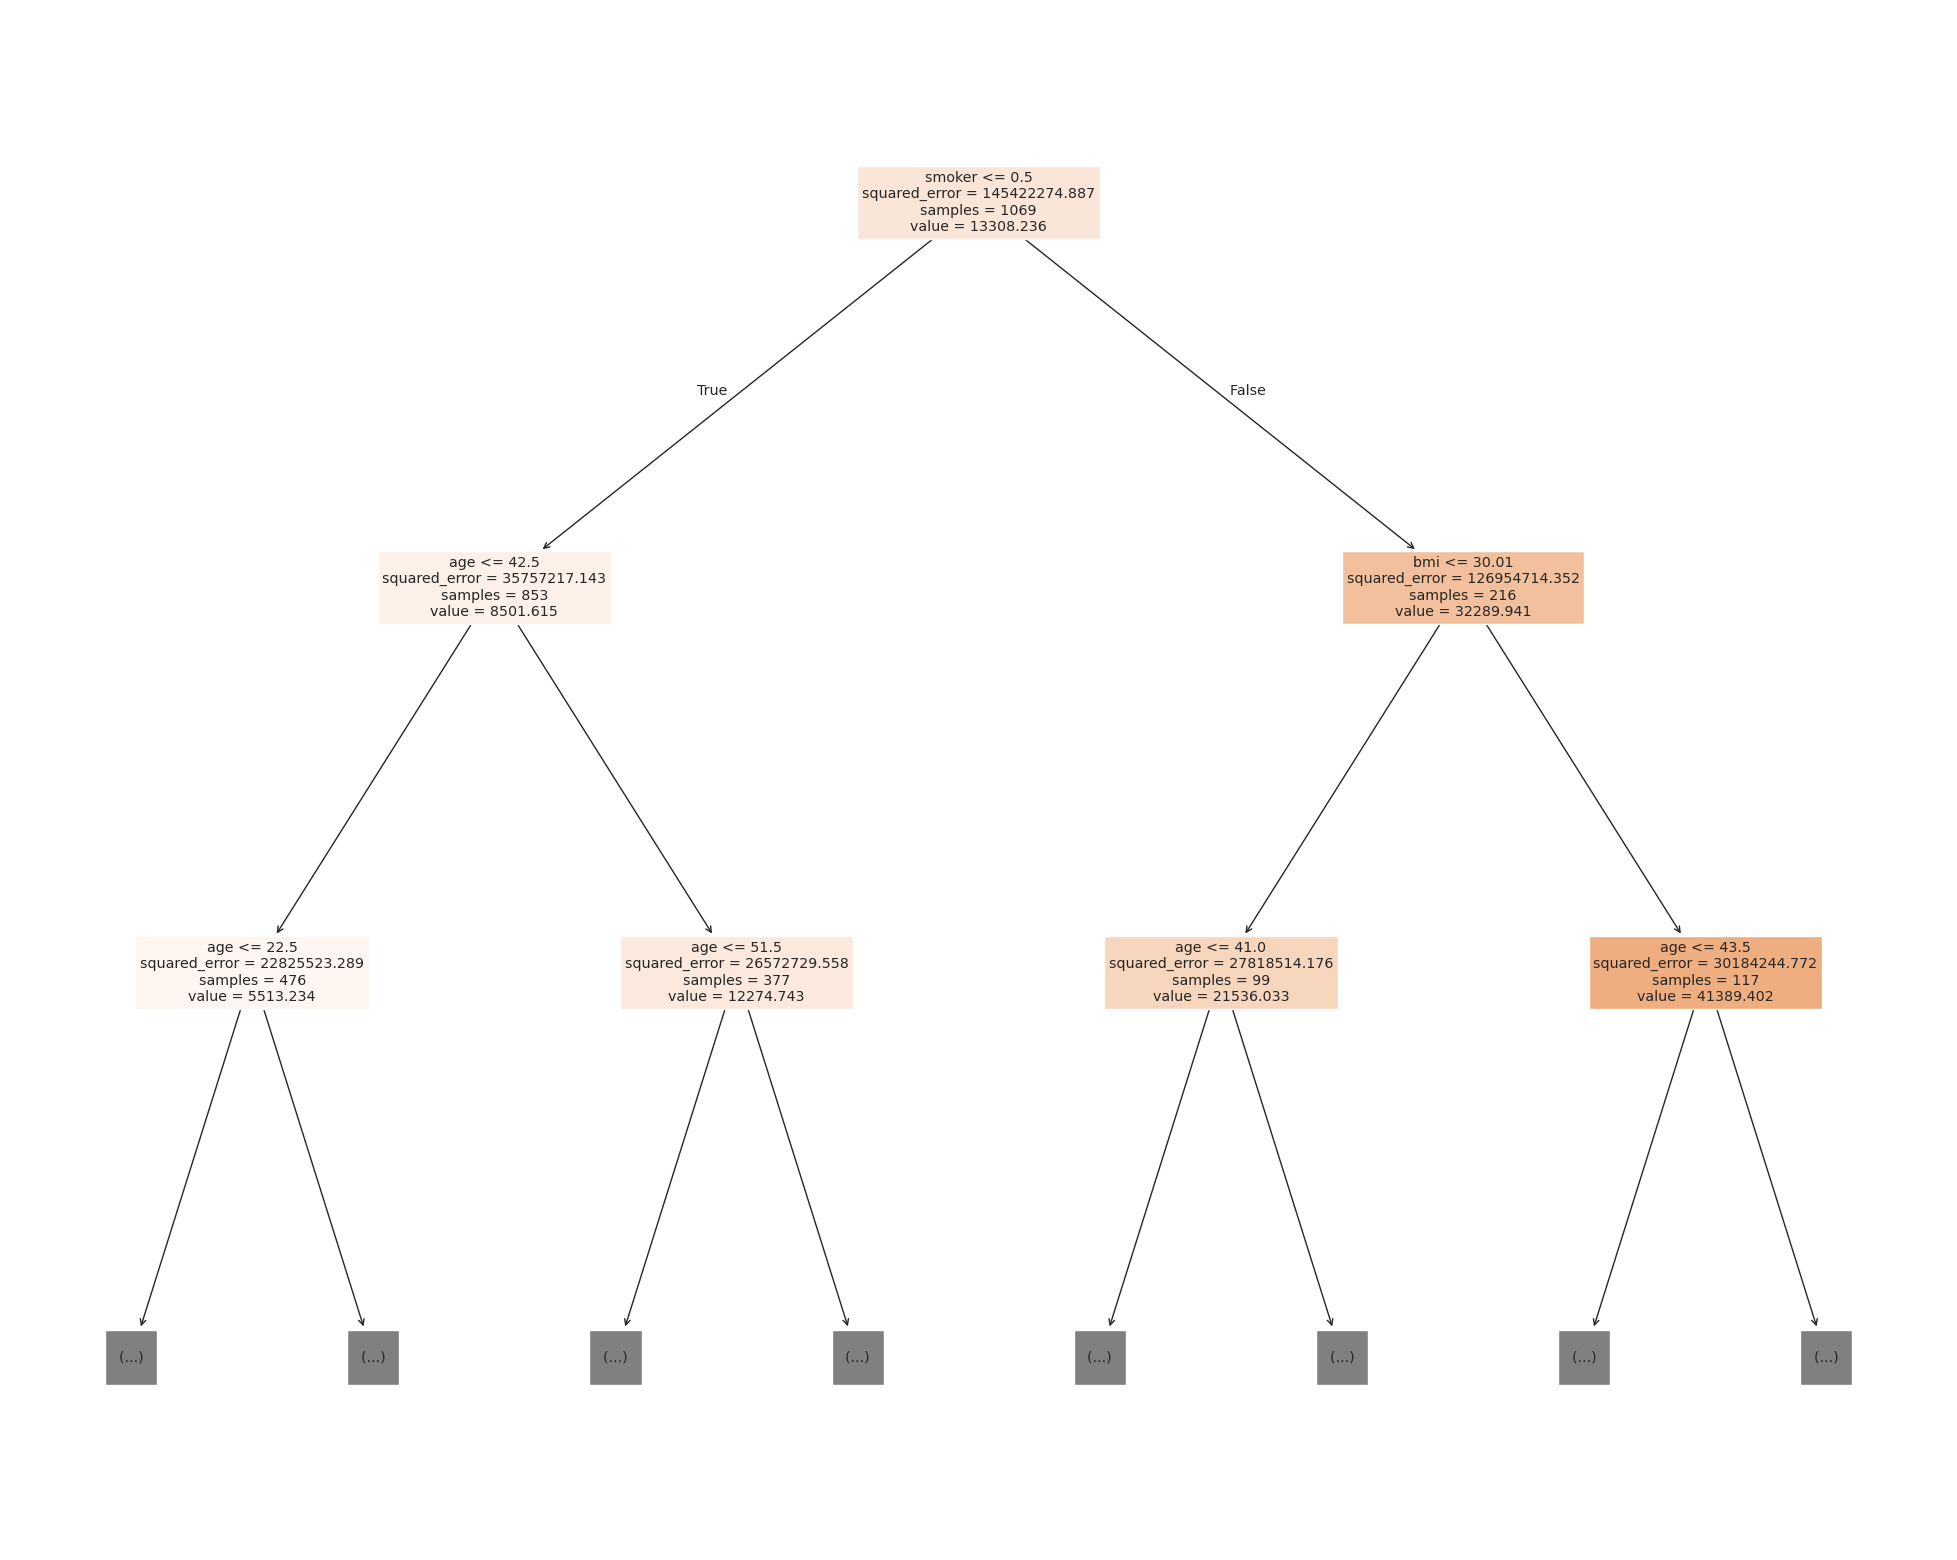

In [132]:
# Visualiza the decision tree
fig = plt.figure(figsize = (25, 20))
_ = tree.plot_tree(tree_model, feature_names = list(x_train.columns), max_depth= 2, filled= True)

## Train a Random Forest Model

In [133]:
rf_model= RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [134]:
# Prediction on test data
train_data_prediction_rf = rf_model.predict(x_train)

# R squared value
r2_train_rf = metrics.r2_score( y_train, train_data_prediction_rf)


print(f"Decision Tree Model:")
print(f"R2 Score Test: {r2_train_rf:.4f}")

Decision Tree Model:
R2 Score Test: 0.9777


In [135]:
# Prediction on test data
test_data_prediction_rf = tree_model.predict(x_test)

# R squared value
r2_test_rf = metrics.r2_score( y_test, test_data_prediction_rf)


print(f"Decision Tree Model:")
print(f"R2 Score Test: {r2_test_rf:.4f}")

Decision Tree Model:
R2 Score Test: 0.7108


# Building a Predictive System

In [108]:
input_data = (31, 1, 25.74, 0, 1, 0)
input_data_array = np.asarray(input_data).reshape(1,-1)

prediction = lr_model.predict(input_data_array)

print(prediction)
print('The insurance cost is USD ', prediction[0])

[27686.11584135]
The insurance cost is USD  27686.115841354836


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
